# MERTCAN KILIÇLI 19050372


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore') # uyarıları göz ardı edelim
%matplotlib inline

Problem: Belirli meyvelerin yüz gramda olan besin değerlerinin (Su(g),Protein(g),Karbonhidrat(g),Yağ(g),Enerji(kcal) karşılaştırılması

Verinin elde edilmesi: Meyve.xlsx data set

KAYNAK:"Çok Değişkenli İstatistiksel yöntemler" 2021,Prof.Dr.Reha Alpar,Detay Yayınları

In [54]:
#Veri okunur
df = pd.read_excel("meyve.xlsx", index_col=0)
df.head()

,Su(g),Protein(g),Karbonhidrat(g),Yağ(g),Enerji(kcal)
Meyve,,,,,
üzüm taze,81,0.6,17.3,0.3,67
üzüm kuru,18,2.5,77.4,0.2,289
incir taze,82,1.2,20.4,0.4,88
incir kuru,23,4.3,6.9,1.3,274
portakal,86,0.8,8.5,0.1,35


In [55]:
df.tail()

,Su(g),Protein(g),Karbonhidrat(g),Yağ(g),Enerji(kcal)
Meyve,,,,,
nar,82,0.5,16.0,0.3,63
dut,80,1.3,17.4,0.3,70
karadut,76,0.9,19.8,1.1,93
ahududu,84,1.2,13.6,0.5,55
ayva,83,0.4,15.3,0.1,71


In [56]:
#veri setinin boyutu
df.shape

(25, 5)

In [57]:
#Veride eksik gözlem var mı?
df.isnull()

,Su(g),Protein(g),Karbonhidrat(g),Yağ(g),Enerji(kcal)
Meyve,,,,,
üzüm taze,False,False,False,False,False
üzüm kuru,False,False,False,False,False
incir taze,False,False,False,False,False
incir kuru,False,False,False,False,False
portakal,False,False,False,False,False
mandalina,False,False,False,False,False
greyfurt,False,False,False,False,False
limon suyu,False,False,False,False,False
elma,False,False,False,False,False


In [58]:
df.isnull().any()

Su(g)              False
Protein(g)         False
Karbonhidrat(g)    False
Yağ(g)             False
Enerji(kcal)       False
dtype: bool

In [59]:
#Her bir sütunda kaç tane eksik eleman bulunuyor?
df.isnull().sum()

Su(g)              0
Protein(g)         0
Karbonhidrat(g)    0
Yağ(g)             0
Enerji(kcal)       0
dtype: int64

In [60]:
#Verinin tamamında kaç tane eksik eleman var?
df.isnull().sum().sum()

0

In [61]:
#Veri hakkında bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, üzüm taze to ayva
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Su(g)            25 non-null     int64  
 1   Protein(g)       25 non-null     float64
 2   Karbonhidrat(g)  25 non-null     float64
 3   Yağ(g)           25 non-null     float64
 4   Enerji(kcal)     25 non-null     int64  
dtypes: float64(3), int64(2)
memory usage: 1.2+ KB


In [62]:
#Betimsel istatistikler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Su(g),25.0,75.840,21.100316,18.0,77.0,83.0,86.0,92.0
Protein(g),25.0,1.232,1.319949,0.3,0.5,0.8,1.2,5.0
Karbonhidrat(g),25.0,16.724,17.584398,1.6,7.7,11.9,17.8,77.4
Yağ(g),25.0,1.260,4.373404,0.1,0.2,0.3,0.5,22.2
Enerji(kcal),25.0,85.280,81.552907,7.0,41.0,55.0,76.0,289.0


In [67]:
df.groupby('Meyve').agg(['mean', 'median'])

Su(g)        Protein(g)        Karbonhidrat(g)        Yağ(g)  \
                  mean median       mean median            mean median   mean   
Meyve                                                                           
ahududu           84.0   84.0        1.2    1.2            13.6   13.6    0.5   
ananas konsantre  77.0   77.0        0.5    0.5            11.6   11.6    0.3   
armut             83.0   83.0        0.3    0.3            10.6   10.6    0.2   
avokado           69.0   69.0        4.2    4.2             1.8    1.8   22.2   
ayva              83.0   83.0        0.4    0.4            15.3   15.3    0.1   
dut               80.0   80.0        1.3    1.3            17.4   17.4    0.3   
elma              84.0   84.0        0.3    0.3            11.9   11.9    0.3   
erik kırmızı      81.0   81.0        0.5    0.5            17.8   17.8    0.2   
greyfurt          91.0   91.0        0.6    0.6             5.3    5.3    0.2   
incir kuru        23.0   23.0        4.3    4.3             6.9    6.9    1.3   
incir taze        82.0   82.0        1.2    1.2            20.4   20.4    0.4   
karadut           76.0   76.0        0.9    0.9            19.8   19.8    1.1   
karpuz            92.0   92.0        0.5    0.5             6.4    6.4    0.2   
kavun             90.0   90.0        0.8    0.8             7.7    7.7    0.3   
kayısı kuru       25.0   25.0        5.0    5.0            66.5   66.5    1.0   
kayısı taze       85.0   85.0        1.0    1.0            18.2   18.2    0.6   
limon suyu        91.0   91.0        0.3    0.3             1.6    1.6    0.5   
mandalina         87.0   87.0        0.8    0.8            11.6   11.6    0.2   
muz               71.0   71.0        1.1    1.1            19.2   19.2    0.2   
nar               82.0   82.0        0.5    0.5            16.0   16.0    0.3   
portakal          86.0   86.0        0.8    0.8             8.5    8.5    0.1   
çilek             89.0   89.0        0.6    0.6             6.2    6.2    0.3   
üzüm kuru         18.0   18.0        2.5    2.5            77.4   77.4    0.2   
üzüm taze         81.0   81.0        0.6    0.6            17.3   17.3    0.3   
şeftali           86.0   86.0        0.6    0.6             9.1    9.1    0.2   

                        Enerji(kcal)         
                 median         mean median  
Meyve                                        
ahududu             0.5         55.0   55.0  
ananas konsantre    0.3         46.0   46.0  
armut               0.2         41.0   41.0  
avokado            22.2        223.0  223.0  
ayva                0.1         71.0   71.0  
dut                 0.3         70.0   70.0  
elma                0.3         46.0   46.0  
erik kırmızı        0.2         66.0   66.0  
greyfurt            0.2         43.0   43.0  
incir kuru          1.3        274.0  274.0  
incir taze          0.4         88.0   88.0  
karadut             1.1         93.0   93.0  
karpuz              0.2         26.0   26.0  
kavun               0.3         33.0   33.0  
kayısı kuru         1.0        260.0  260.0  
kayısı taze         0.6         51.0   51.0  
limon suyu          0.5          7.0    7.0  
mandalina           0.2         46.0   46.0  
muz                 0.2         76.0   76.0  
nar                 0.3         63.0   63.0  
portakal            0.1         35.0   35.0  
çilek               0.3         26.0   26.0  
üzüm kuru           0.2        289.0  289.0  
üzüm taze           0.3         67.0   67.0  
şeftali             0.2         37.0   37.0

In [68]:
df.isna().sum()

Su(g)              0
Protein(g)         0
Karbonhidrat(g)    0
Yağ(g)             0
Enerji(kcal)       0
dtype: int64

In [69]:
df.corr()

,Su(g),Protein(g),Karbonhidrat(g),Yağ(g),Enerji(kcal)
Su(g),1.000000,-0.818739,-0.737350,-0.105548,-0.944426
Protein(g),-0.818739,1.000000,0.454034,0.510465,0.907172
Karbonhidrat(g),-0.737350,0.454034,1.000000,-0.163964,0.645529
Yağ(g),-0.105548,0.510465,-0.163964,1.000000,0.387886
Enerji(kcal),-0.944426,0.907172,0.645529,0.387886,1.000000


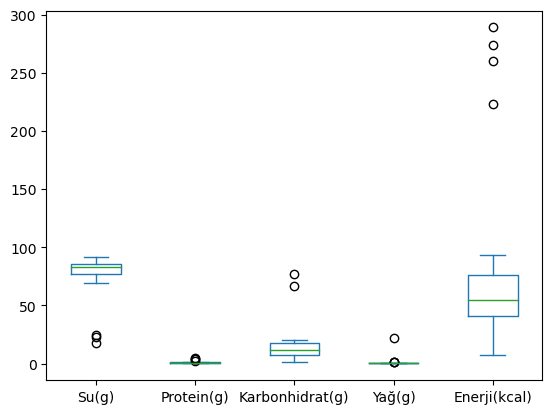

In [27]:
#Kutu grafikleri
df.plot(kind='box')
plt.show()

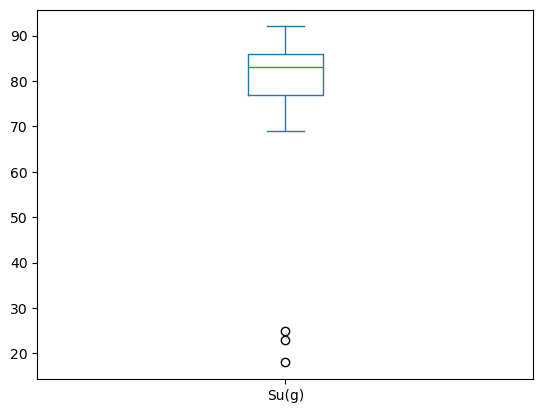

In [28]:
df["Su(g)"].plot(kind='box')
plt.show()

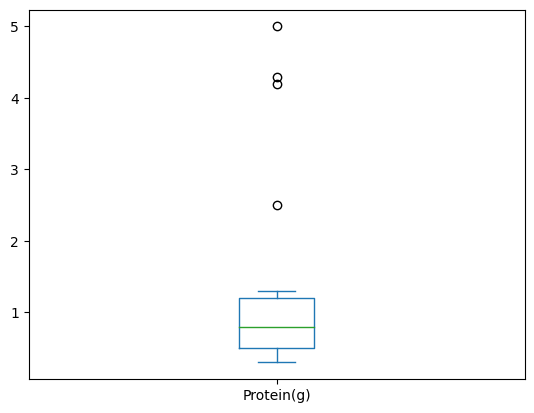

In [29]:
df["Protein(g)"].plot(kind='box')
plt.show()

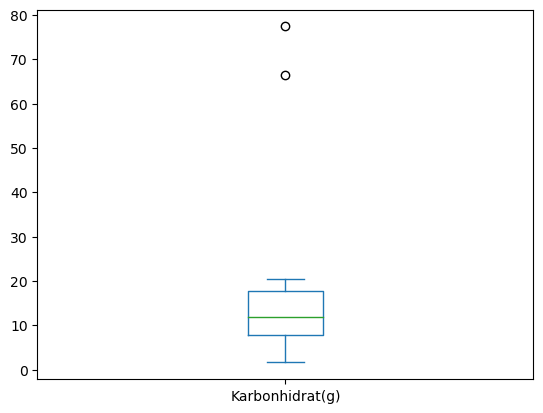

In [30]:
df["Karbonhidrat(g)"].plot(kind='box')
plt.show()

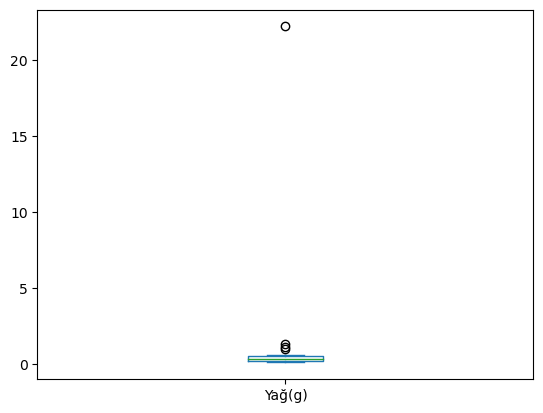

In [31]:
df["Yağ(g)"].plot(kind='box')
plt.show()

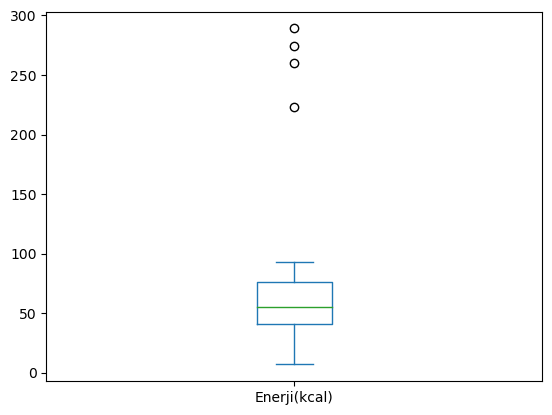

In [32]:
df["Enerji(kcal)"].plot(kind='box')
plt.show()

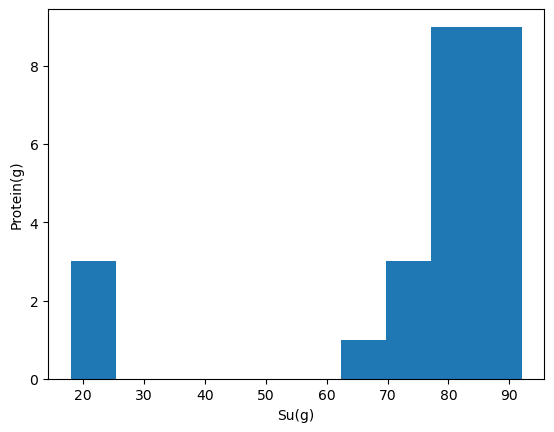

In [34]:
plt.hist(df["Su(g)"])
plt.xlabel("Su(g)") 
plt.ylabel("Protein(g)") 
plt.show()

<AxesSubplot:xlabel='Protein(g)', ylabel='Density'>

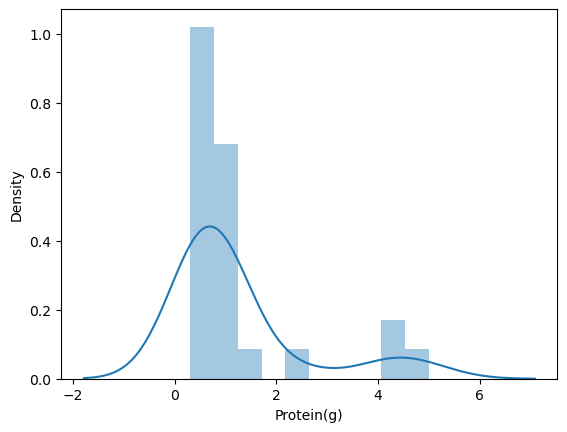

In [35]:
sns.distplot(df["Protein(g)"])

<AxesSubplot:xlabel='Protein(g)', ylabel='Count'>

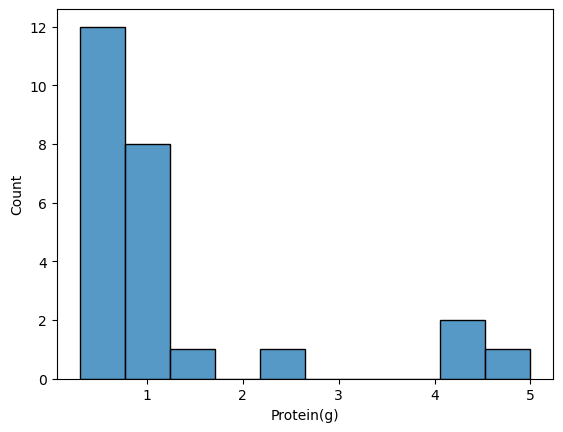

In [36]:
sns.histplot(df["Protein(g)"])

<AxesSubplot:>

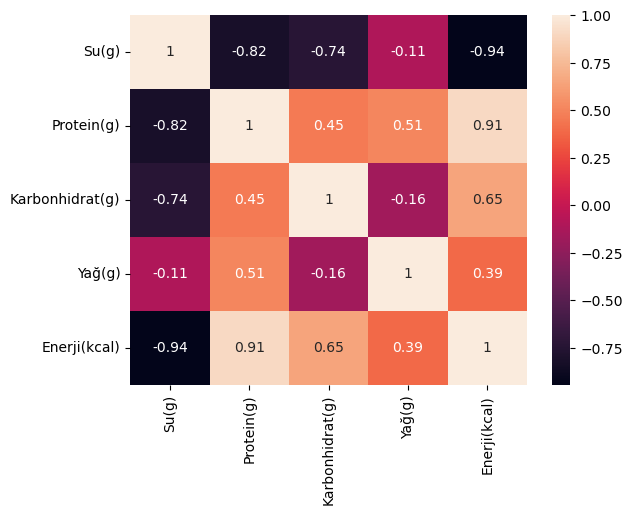

In [37]:
# veri setindeki değişkenler arasında korelasyon var mı? 
sns.heatmap(df.corr(),annot=True)

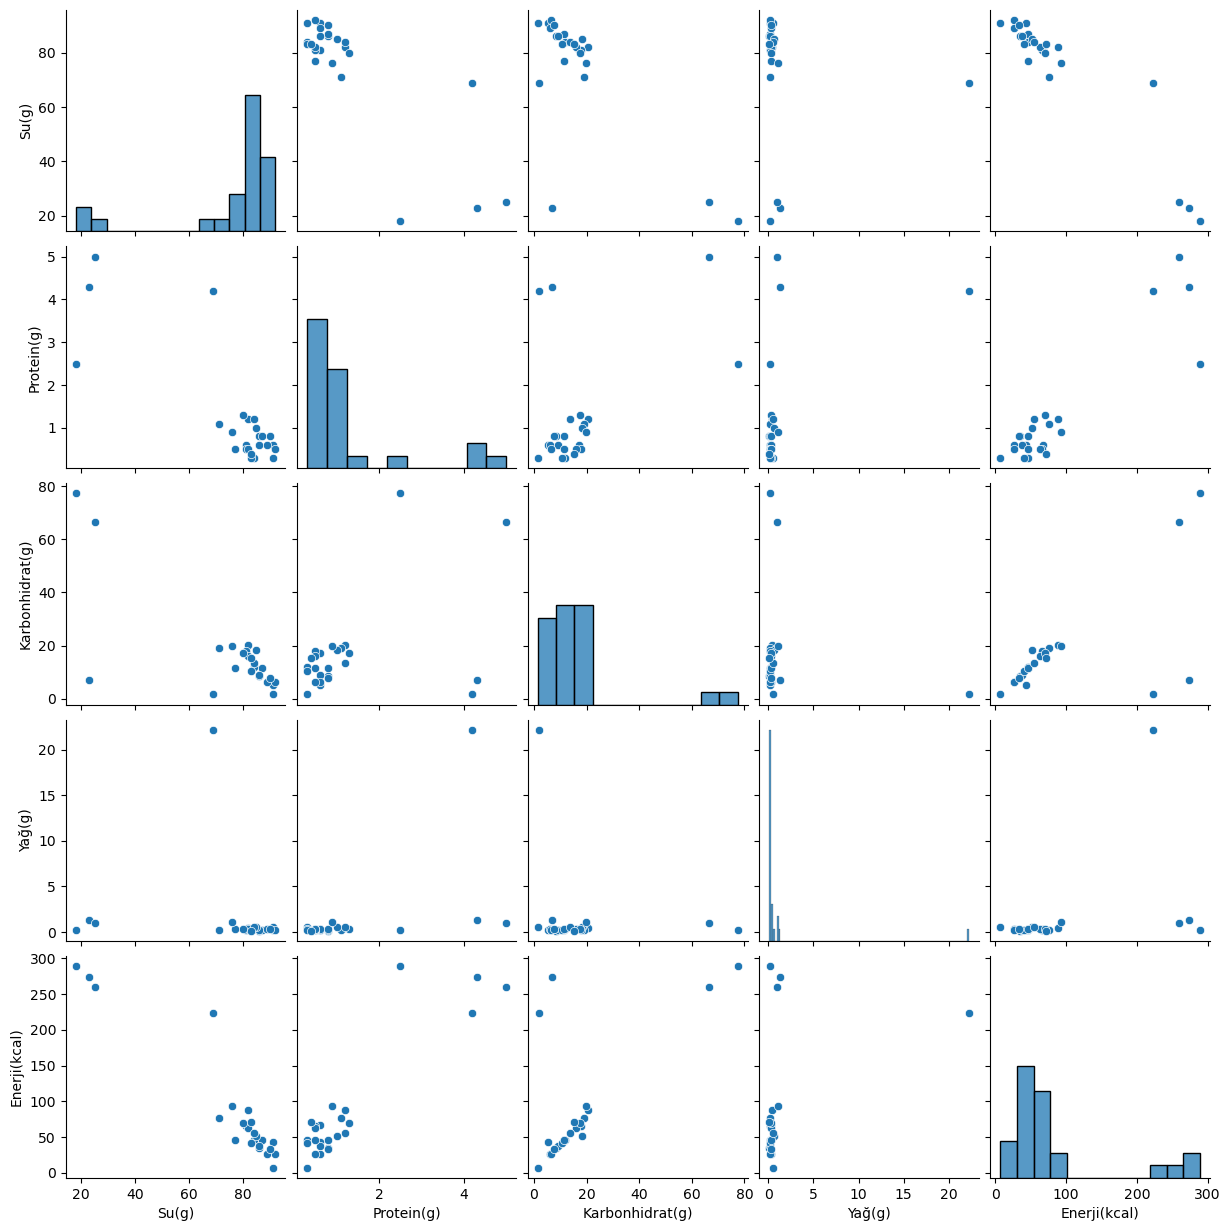

In [38]:
# veri setindeki değişkenlerin birbiri ile serpilme diyagramı çizdirilerek, verilerin ilişkisi görselleştirilsin 
sns.pairplot(df)